In [117]:
import re

# Read the content of the file
with open('VraiMesure_23_01_N°3', 'r') as file:
    content = file.read()

# Use regular expressions to extract the distance data
pattern = re.compile(r'\b(\d+)\s*:\s*\d+\b')
matches = pattern.findall(content)

# Convert the extracted data to a list of integers
distances = list(map(int, matches))

# Create 8x8 matrices
matrices = [distances[i:i+8] for i in range(0, len(distances), 8)]
# New list to store matrices that meet the condition
selected_matrices = []
# Print each set of 8 lines separately, skipping every second line
for i in range(0, len(matrices), 16):
    for j in range(16):
        if (i + j) % 2 == 0:
            selected_matrices.append(matrices[i + j])
            #print(matrices[i + j])

print(selected_matrices)


[[671, 696, 725, 752, 785, 825, 889, 982], [665, 688, 715, 749, 777, 815, 858, 938], [651, 687, 719, 750, 782, 809, 850, 903], [652, 688, 716, 748, 774, 803, 833, 900], [659, 681, 712, 758, 773, 803, 832, 891], [646, 679, 711, 734, 767, 795, 821, 888], [642, 667, 701, 729, 763, 786, 829, 897], [643, 665, 691, 725, 752, 795, 834, 860], [667, 697, 722, 754, 778, 825, 898, 979], [661, 686, 720, 738, 767, 804, 860, 950], [659, 686, 720, 750, 777, 806, 853, 927], [650, 689, 718, 753, 776, 802, 832, 897], [648, 684, 717, 752, 773, 806, 836, 901], [652, 676, 712, 738, 772, 798, 838, 886], [639, 667, 699, 731, 766, 792, 828, 896], [644, 664, 694, 723, 758, 787, 829, 862], [669, 693, 727, 749, 783, 829, 891, 1000], [662, 685, 718, 743, 779, 809, 855, 945], [658, 689, 717, 756, 773, 807, 844, 914], [655, 686, 719, 754, 784, 797, 839, 895], [653, 685, 720, 748, 777, 801, 836, 907], [644, 678, 713, 745, 767, 788, 829, 893], [641, 671, 701, 731, 764, 786, 827, 890], [644, 668, 697, 721, 762, 787, 8

In [118]:
grouped_matrices = []

# Iterate over matrices and group each 8 arrays into a new matrix
for i in range(0, len(selected_matrices), 8):
    current_group = selected_matrices[i:i+8]
    grouped_matrix = np.vstack(current_group)
    grouped_matrices.append(grouped_matrix)

# Now 'grouped_matrices' contains the matrices grouped in sets of 8
for matrix in grouped_matrices:
    print(matrix)
    print()

[[671 696 725 752 785 825 889 982]
 [665 688 715 749 777 815 858 938]
 [651 687 719 750 782 809 850 903]
 [652 688 716 748 774 803 833 900]
 [659 681 712 758 773 803 832 891]
 [646 679 711 734 767 795 821 888]
 [642 667 701 729 763 786 829 897]
 [643 665 691 725 752 795 834 860]]

[[667 697 722 754 778 825 898 979]
 [661 686 720 738 767 804 860 950]
 [659 686 720 750 777 806 853 927]
 [650 689 718 753 776 802 832 897]
 [648 684 717 752 773 806 836 901]
 [652 676 712 738 772 798 838 886]
 [639 667 699 731 766 792 828 896]
 [644 664 694 723 758 787 829 862]]

[[ 669  693  727  749  783  829  891 1000]
 [ 662  685  718  743  779  809  855  945]
 [ 658  689  717  756  773  807  844  914]
 [ 655  686  719  754  784  797  839  895]
 [ 653  685  720  748  777  801  836  907]
 [ 644  678  713  745  767  788  829  893]
 [ 641  671  701  731  764  786  827  890]
 [ 644  668  697  721  762  787  836  887]]

[[ 667  693  720  756  782  833  882 1009]
 [ 662  685  718  748  780  815  861  943]
 [ 6

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Given list of matrices

# Calculate the average matrix
average_matrix = np.mean(grouped_matrices, axis=0)

# Print the result
print(average_matrix)


[[668.95238095 693.42857143 723.85714286 751.52380952 783.52380952
  826.47619048 887.42857143 988.61904762]
 [660.         687.04761905 717.04761905 747.42857143 777.80952381
  813.04761905 859.38095238 941.80952381]
 [656.28571429 688.14285714 720.         751.19047619 778.95238095
  809.47619048 848.         913.14285714]
 [653.0952381  688.47619048 719.85714286 750.19047619 776.04761905
  804.9047619  839.80952381 897.80952381]
 [651.42857143 685.38095238 717.76190476 748.14285714 776.
  803.28571429 834.28571429 895.47619048]
 [646.95238095 678.76190476 710.57142857 742.52380952 769.14285714
  795.61904762 832.80952381 891.28571429]
 [642.         669.04761905 700.23809524 730.0952381  761.61904762
  789.14285714 830.0952381  892.47619048]
 [642.47619048 666.47619048 694.9047619  723.80952381 754.85714286
  790.47619048 833.23809524 862.61904762]]


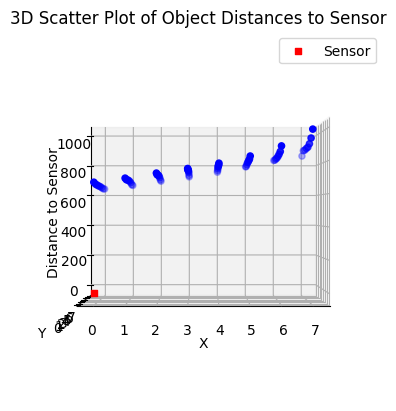

In [120]:
# Get the coordinates and distances
x, y = np.meshgrid(np.arange(average_matrix.shape[1]), np.arange(average_matrix.shape[0]))
z = average_matrix


# Offset the coordinates to place the sensor at (0, 0, 0)
x_offset, y_offset = x - x.max() / 2, y - y.max() / 2

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.ravel(), y.ravel(), z.ravel(), c='b', marker='o')

# Plot sensor at (0, 0, 0)
ax.scatter(0, 0, 0, c='r', marker='s', label='Sensor')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distance to Sensor')
ax.set_title('3D Scatter Plot of Object Distances to Sensor')
# Adjust viewing angles
ax.view_init(elev=00, azim=270)  # Adjust the elevation and azimuth angles

# Add legend
ax.legend()

plt.show()

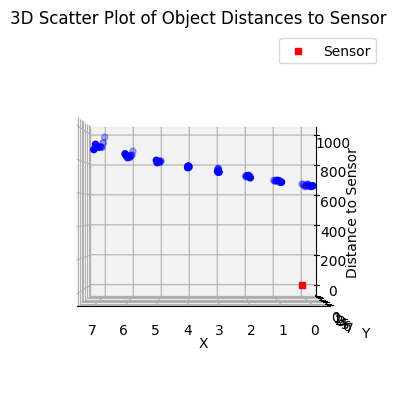

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

first_matrix = grouped_matrices[0]

# Convert the list to a NumPy array
first_matrix = np.array(first_matrix)

# Get the coordinates and distances
x, y = np.meshgrid(np.arange(first_matrix.shape[1]), np.arange(first_matrix.shape[0]))
z = first_matrix

# Offset the coordinates to place the sensor at (0, 0, 0)
x_offset, y_offset = x - x.max() / 2, y - y.max() / 2

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.ravel(), y.ravel(), z.ravel(), c='b', marker='o')

# Plot sensor at (0, 0, 0)
ax.scatter(0, 0, 0, c='r', marker='s', label='Sensor')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distance to Sensor')
ax.set_title('3D Scatter Plot of Object Distances to Sensor')
# Adjust viewing angles
ax.view_init(elev=00, azim=90)  # Adjust the elevation and azimuth angles

# Add legend
ax.legend()



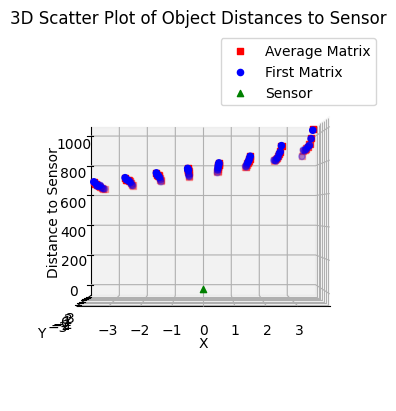

In [122]:
# Get the coordinates and distances for each matrix
x1, y1 = np.meshgrid(np.arange(average_matrix.shape[1]), np.arange(average_matrix.shape[0]))
z1 = average_matrix

x2, y2 = np.meshgrid(np.arange(first_matrix.shape[1]), np.arange(first_matrix.shape[0]))
z2 = first_matrix

# Offset the coordinates to place the sensor at (0, 0, 0)
x_offset1, y_offset1 = x1 - x1.max() / 2, y1 - y1.max() / 2
x_offset2, y_offset2 = x2 - x2.max() / 2, y2 - y2.max() / 2

# Create a 3D scatter plot with adjusted coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot objects from matrix1 in blue
ax.scatter(x_offset1.ravel(), y_offset1.ravel(), z1.ravel(), c='r', marker='s', label='Average Matrix')

# Plot objects from matrix2 in red
ax.scatter(x_offset2.ravel(), y_offset2.ravel(), z2.ravel(), c='b', marker='o', label='First Matrix')

# Plot sensor at (0, 0, 0)
ax.scatter(0, 0, 0, c='g', marker='^', label='Sensor')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distance to Sensor')
ax.set_title('3D Scatter Plot of Object Distances to Sensor')

# Adjust viewing angles
ax.view_init(elev=00, azim=270)  # Adjust the elevation and azimuth angles

# Add legend
ax.legend()

plt.show()